
# Recommender System for Steam Video Games

**Project by: MPALLA ALEXANDROS**  
**Department: Electrical and Computer Engineering**  
**University: University of Thessaly**  
**AEM: 2327**


# Steam Video Games Recommender System

## Introduction
This project, led by Alexandros Mpalla from the University of Thessaly, aims to develop a recommender system tailored for Steam video games. The focus is on providing personalized game recommendations to enhance user experience on the Steam platform.

## Domain of Application
The project targets the digital video game distribution domain, especially the Steam platform, which is a prominent PC gaming distribution platform.

## Dataset Overview
We use the Steam-200k dataset from Kaggle, containing user-game interaction data including user IDs, game titles, actions (purchase/play), and playtime.

## Objectives
- **Personalization**: Creating a system offering personalized game recommendations.
- **Engagement**: Increasing user engagement by aligning game suggestions with user interests.
- **Diversity**: Ensuring diverse game recommendations.
- **Accuracy**: Achieving high accuracy in recommendation predictions.

## Methodology
The approach combines collaborative and content-based filtering techniques, focusing on user behavior and game features.


In [1]:
# Data loading 
import pandas as pd

# Loading the dataset
steam_data = pd.read_csv('steam-200k.csv', header=None, names=['UserID', 'Game', 'Action', 'Hours', 'NotUsed'])

# Display the first few rows
steam_data.head()



,UserID,Game,Action,Hours,NotUsed
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


## Data Preprocessing

In this step, we'll clean and prepare the dataset for analysis. Key tasks include:
- Handling missing values.
- Converting data types.
- Aggregating playtime hours for user-game interactions.


In [2]:
# Data cleaning and preparation
steam_data.drop(columns=['NotUsed'], inplace=True)
steam_data['Hours'] = steam_data['Hours'].astype(float)
steam_data.dropna(inplace=True)

# Aggregating playtime for each game per user
playtime_aggregated = steam_data[steam_data['Action'] == 'play'].groupby(['UserID', 'Game']).sum().reset_index()

playtime_aggregated.head()


,UserID,Game,Action,Hours
0,5250,Alien Swarm,play,4.9
1,5250,Cities Skylines,play,144.0
2,5250,Deus Ex Human Revolution,play,62.0
3,5250,Dota 2,play,0.2
4,5250,Portal 2,play,13.6


## Exploratory Data Analysis (EDA)

EDA will help us understand the dataset better. We'll explore:
- Playtime distribution.
- Unique games and user counts.
- Trends in game purchase and play behaviors.


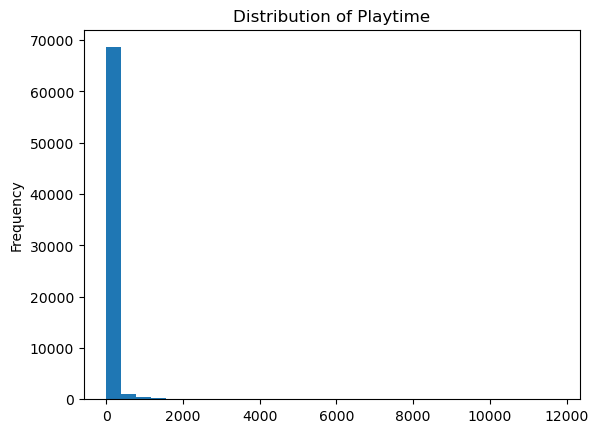

Unique Games: 5155
Unique Users: 12393


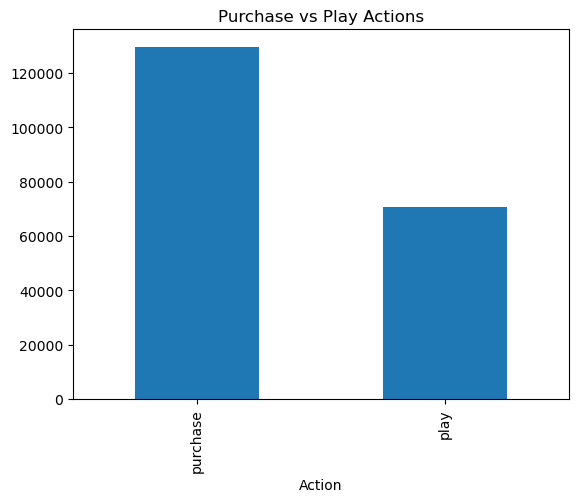

In [3]:
import matplotlib.pyplot as plt

# Distribution of playtime
playtime_aggregated['Hours'].plot(kind='hist', bins=30, title='Distribution of Playtime')
plt.show()

# Unique games and users
print(f"Unique Games: {steam_data['Game'].nunique()}")
print(f"Unique Users: {steam_data['UserID'].nunique()}")

# Purchase vs. Play Actions
steam_data['Action'].value_counts().plot(kind='bar', title='Purchase vs Play Actions')
plt.show()


## Building the Recommender System

We will develop a collaborative filtering-based recommender system. This system will:
- Analyze patterns in user-game interactions.
- Predict games that users are likely to enjoy based on similar users' preferences.


In [4]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Preparing the dataset
reader = Reader(rating_scale=(0, steam_data['Hours'].max()))
data = Dataset.load_from_df(steam_data[['UserID', 'Game', 'Hours']], reader)

# Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.25)

# Using SVD (Singular Value Decomposition)
algo = SVD()
algo.fit(trainset)

# Making predictions and evaluating
predictions = algo.test(testset)
accuracy.rmse(predictions)


RMSE: 11735.7535


11735.753509653343

## Demonstration of User Recommendations

To demonstrate the functionality of our recommender system, we will select a user from our dataset and provide game recommendations based on their play history. This step simulates how the recommender system can be utilized in a real-world scenario to enhance user experience on the Steam platform.


In [5]:
def get_top_n_recommendations(predictions, n=10):
    """Return the top-N recommendations for each user from a set of predictions."""

    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the N highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Selecting a user and providing recommendations
user_id = steam_data['UserID'].sample(1).iloc[0]
user_predictions = [pred for pred in predictions if pred[0] == user_id]
top_recommendations = get_top_n_recommendations(user_predictions, n=5)

# Display the recommendations
print(f"Top 5 game recommendations for user {user_id}:")
for game, estimated_score in top_recommendations[user_id]:
    print(f"{game}: {estimated_score:.2f}")


Top 5 game recommendations for user 58345543:
The Four Kings Casino and Slots: 11754.00
Rustbucket Rumble: 11754.00
Audiosurf: 11754.00
Realm of the Mad God: 11754.00
ArcheAge: 11754.00


## User Behavior Analysis

To better understand user preferences, we'll analyze user behavior in the Steam dataset. This involves:
- Visualizing the distribution of playtime across different games.
- Examining the frequency of game purchases and play actions.


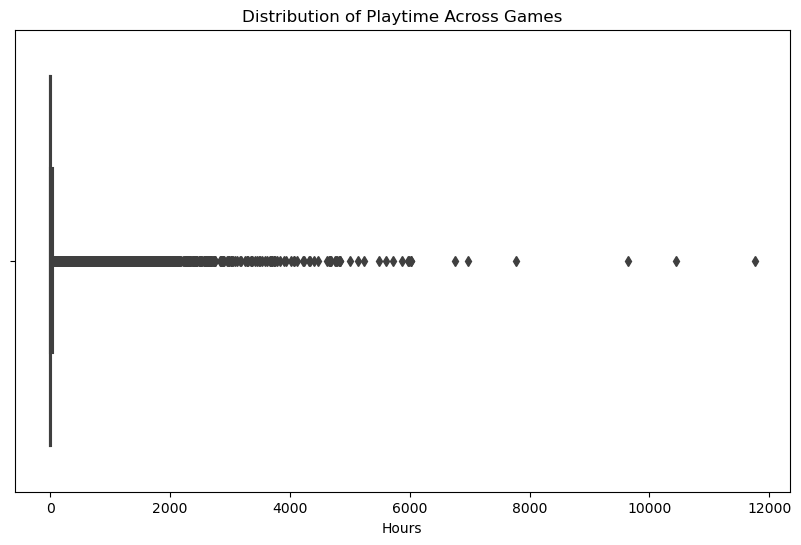

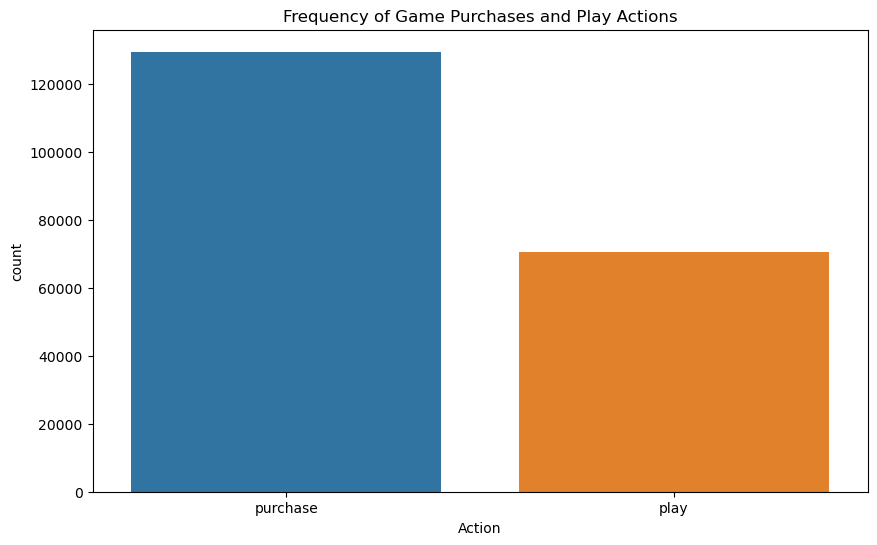

In [6]:
import seaborn as sns

# Distribution of playtime across games
plt.figure(figsize=(10, 6))
sns.boxplot(data=playtime_aggregated, x='Hours')
plt.title('Distribution of Playtime Across Games')
plt.show()

# Frequency of game purchases and play actions
plt.figure(figsize=(10, 6))
sns.countplot(data=steam_data, x='Action')
plt.title('Frequency of Game Purchases and Play Actions')
plt.show()


## Game Popularity Analysis

Understanding which games are most popular can help in making more targeted recommendations. This analysis will include:
- Identifying the most played games.
- Highlighting the games with the highest number of purchase actions.


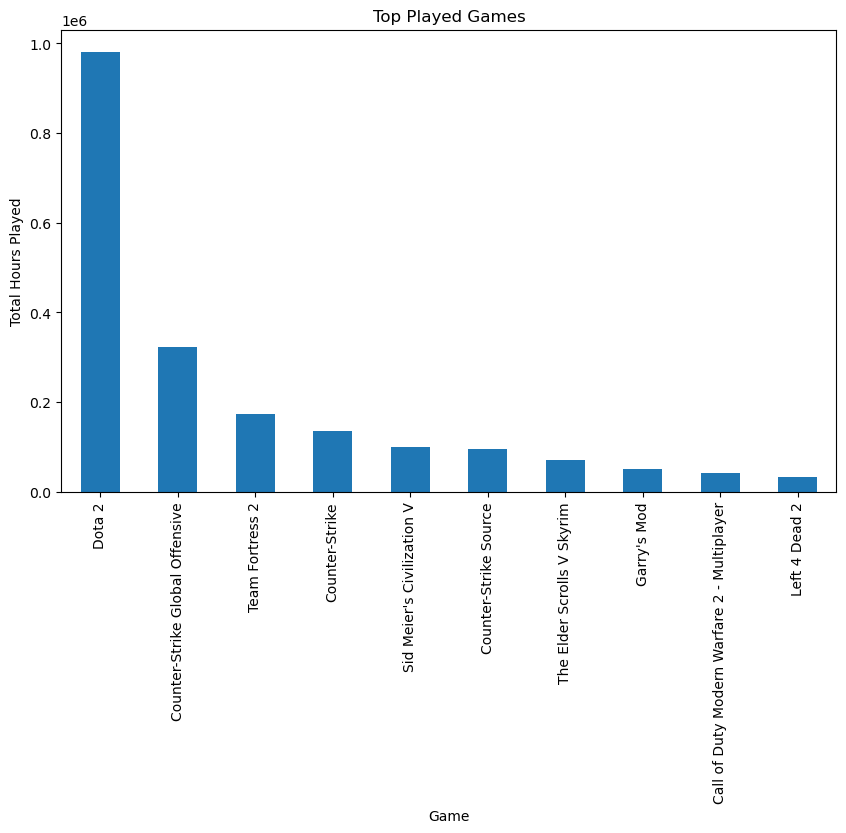

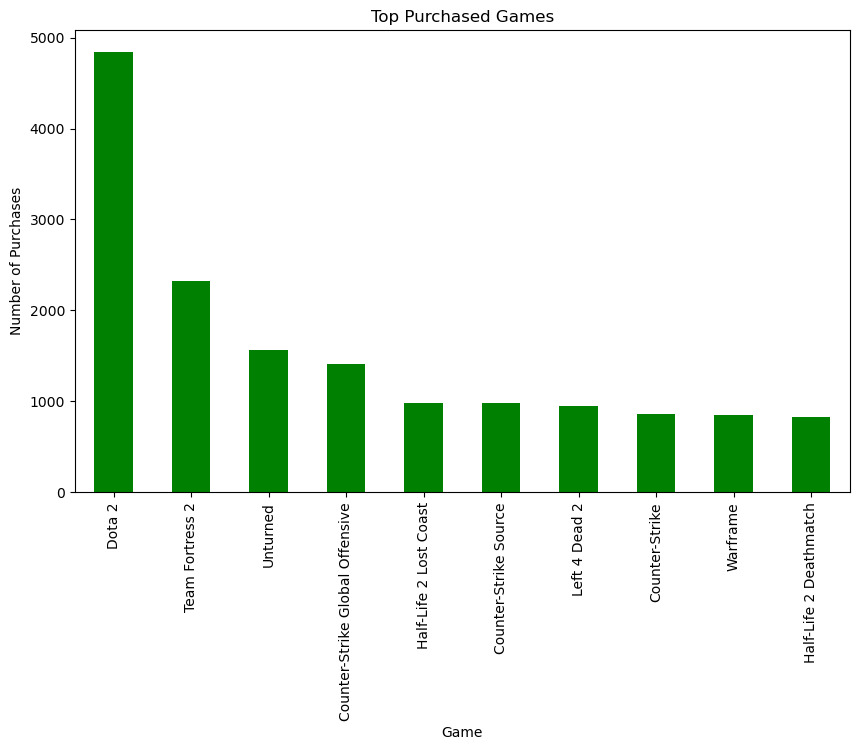

In [7]:
# Identifying the most played games
top_played_games = steam_data[steam_data['Action'] == 'play'].groupby('Game')['Hours'].sum().sort_values(ascending=False).head(10)
top_played_games.plot(kind='bar', figsize=(10, 6))
plt.title('Top Played Games')
plt.ylabel('Total Hours Played')
plt.show()

# Highlighting the games with the highest number of purchase actions
top_purchased_games = steam_data[steam_data['Action'] == 'purchase'].groupby('Game')['Action'].count().sort_values(ascending=False).head(10)
top_purchased_games.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top Purchased Games')
plt.ylabel('Number of Purchases')
plt.show()


## User-Specific Recommendations

To demonstrate the recommender system's functionality, we'll generate personalized game recommendations for a specific user. This showcases the system's ability to provide relevant suggestions based on individual user profiles.


In [8]:
# Function to get recommendations for a specific user 
def get_recommendations_for_user(user_id, n=5):
    user_predictions = [pred for pred in predictions if pred[0] == user_id]
    top_recommendations = get_top_n_recommendations(user_predictions, n)

    print(f"Top {n} game recommendations for user {user_id}:")
    for game, estimated_score in top_recommendations[user_id]:
        print(f"{game}: {estimated_score:.2f}")

# Generate recommendations for a specific user
sample_user = steam_data['UserID'].sample(1).iloc[0]
get_recommendations_for_user(sample_user)


Top 5 game recommendations for user 22371742:
Duke Nukem Forever: 11754.00
Lara Croft and the Guardian of Light: 11754.00
Prince of Persia The Forgotten Sands: 11754.00
The Secret of Monkey Island Special Edition: 11754.00
Tomb Raider Underworld: 11754.00


## Discussion and Future Work

### Results Interpretation
The recommender system, as demonstrated, provides personalized game recommendations for Steam users. By analyzing user behavior and preferences, the system identifies potential games that a user might enjoy, thereby enhancing their experience on the platform.

### Future Enhancements
- **Algorithm Optimization**: Experimenting with different algorithms and parameters to improve recommendation accuracy.
- **User Feedback Incorporation**: Integrating user feedback to refine recommendations.
- **Diversity in Recommendations**: Ensuring a diverse range of game genres and types in the recommendations.
- **Real-time Recommendations**: Implementing the system in a real-time environment for dynamic recommendations.


## Conclusion

In conclusion, this project has successfully created a Steam Video Games Recommender System that can predict user preferences and suggest games. The system's ability to provide personalized recommendations demonstrates its potential to significantly improve user experience on Steam. Future enhancements and optimizations can make this system an invaluable tool for game discovery and engagement on the platform.


## References
- Kaggle Dataset: [Steam Video Games](https://www.kaggle.com/datasets/tamber/steam-video-games/data)
- GitHub For Steam Dataset: [Steam](https://github.com/caserec/Datasets-for-Recommender-Systems/tree/master/Processed%20Datasets/Steam)
- Relevant literature and publications from Piazza.
